<a href="https://colab.research.google.com/github/techsidh/Amazon-reviews-sentiment-analysis/blob/main/Amazon_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
#general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#NLP libraries

import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

#Modeling libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

n this way, the following attributes are available in the data:

1. Id (numerical): start and end date of the attack in timestamp format.
2. ProductId (categorical): ID of the referenced product by the customer.
3. UserId (categorical): registered user ID.
4. ProfileName (text): registered user profile name.
5. HelpfulnessNumerator (numerical): number of users who found the review helpful.
6. HelpfulnessDenominator (numerical): Number of users who voted whether the review was helpful or not.
7. Score (ordinal): rating between 1 and 5.
8. Time (numerical): timestamp of the review.
9. Summary (text): brief summary of the review.
10. Text (text): text of the review.

In [102]:
amazon_reviews = pd.read_csv('https://media.githubusercontent.com/media/juliandariomirandacalle/NLP_Notebooks/master/01-Introduction_NLP/Customer_Reviews.csv')
amazon_reviews.shape

(10000, 9)

In [103]:
amazon_reviews.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [104]:
amazon_reviews.tail()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
9995,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...
9999,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [105]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ProductId               10000 non-null  object
 1   UserId                  10000 non-null  object
 2   ProfileName             10000 non-null  object
 3   HelpfulnessNumerator    10000 non-null  int64 
 4   HelpfulnessDenominator  10000 non-null  int64 
 5   Score                   10000 non-null  int64 
 6   Time                    10000 non-null  int64 
 7   Summary                 10000 non-null  object
 8   Text                    10000 non-null  object
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [106]:
amazon_reviews.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,1.573500,2.014900,4.134500,1.294359e+09
std,5.230634,5.807551,1.327172,4.769699e+07
min,0.000000,0.000000,1.000000,9.617184e+08
25%,0.000000,0.000000,4.000000,1.268762e+09
50%,0.000000,1.000000,5.000000,1.307837e+09
75%,2.000000,2.000000,5.000000,1.329955e+09
max,187.000000,216.000000,5.000000,1.351210e+09


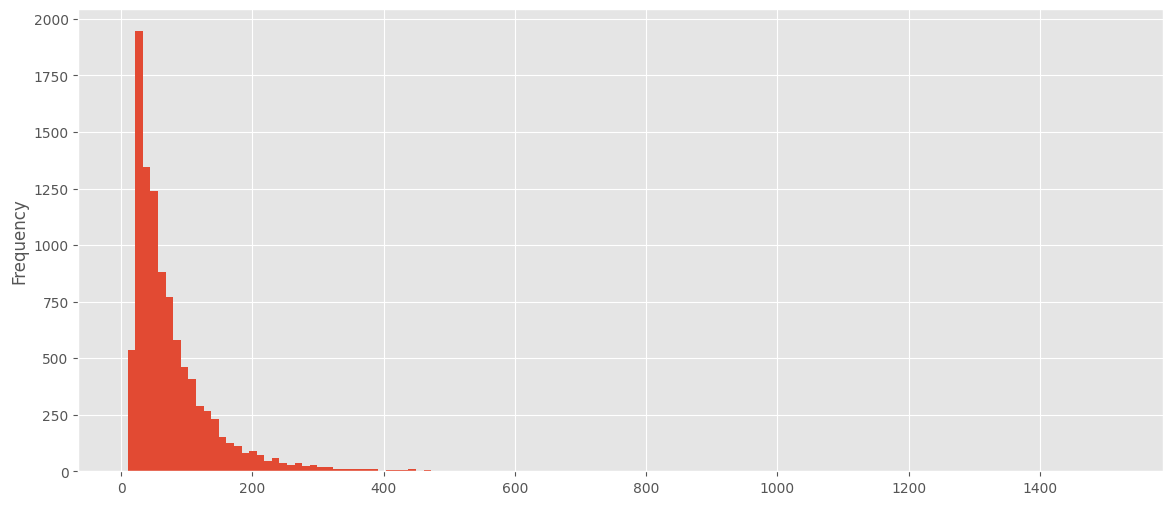

In [107]:
word_per_review = amazon_reviews.Text.apply(lambda x:len(x.split(" "))).plot(kind ='hist',bins = 130)

In [108]:
# print("Average Words:", word_per_review.mean())
# print("Skewness Words:", word_per_review.skew())

## Check distibution of rating


In [109]:
percent_val = 100*amazon_reviews['Score'].value_counts(normalize = True)
percent_val

5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: Score, dtype: float64

<Axes: ylabel='Score'>

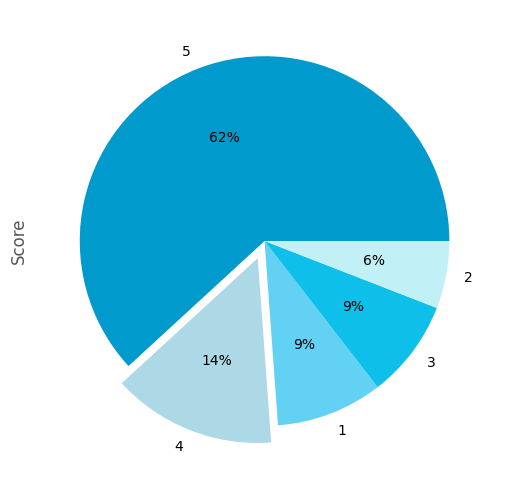

In [110]:

color = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9','#C1F0F6', '#0099CC']
percent_val.plot(kind = 'pie',autopct='%.0f%%',explode = [0, 0.1, 0 , 0, 0],colors = color)


## Check users who found the review helpful

<Axes: ylabel='Frequency'>

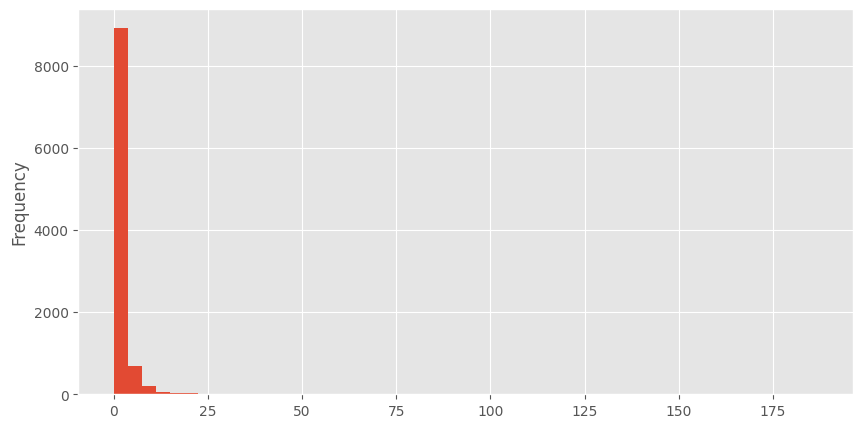

In [111]:
plt.figure(figsize = (10,5))
amazon_reviews['HelpfulnessNumerator'].plot(kind = 'hist',bins = 50)

<Axes: ylabel='Frequency'>

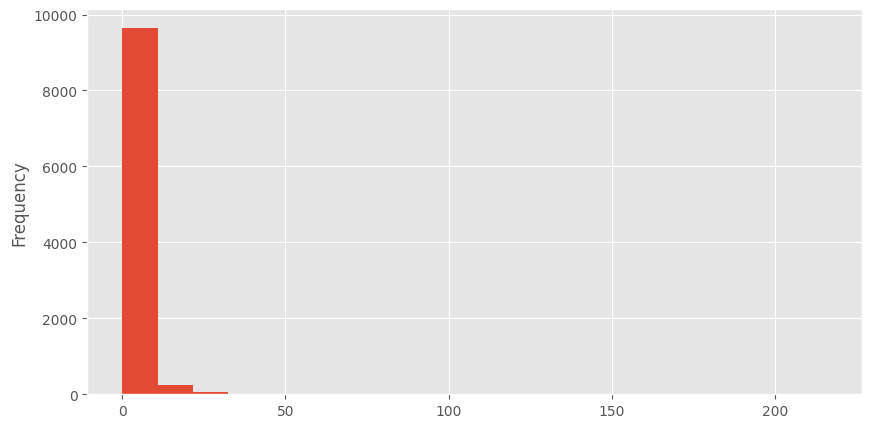

In [112]:
plt.figure(figsize = (10,5))
amazon_reviews['HelpfulnessDenominator'].plot(kind = 'hist',bins = 20)


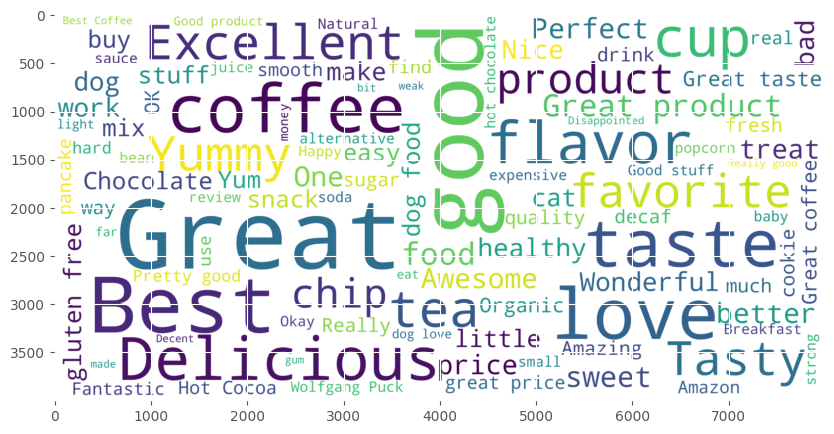

In [113]:
word_cloud_summary = " ".join(amazon_reviews['Summary'])

word_summary = WordCloud(max_font_size = 100,
                         max_words = 100,
                         background_color='white',
                         scale = 10,
                         width = 800,
                         height = 400).generate(word_cloud_summary)

plt.figure(figsize = (10,5))
plt.imshow(word_summary,
           interpolation = 'bilinear')

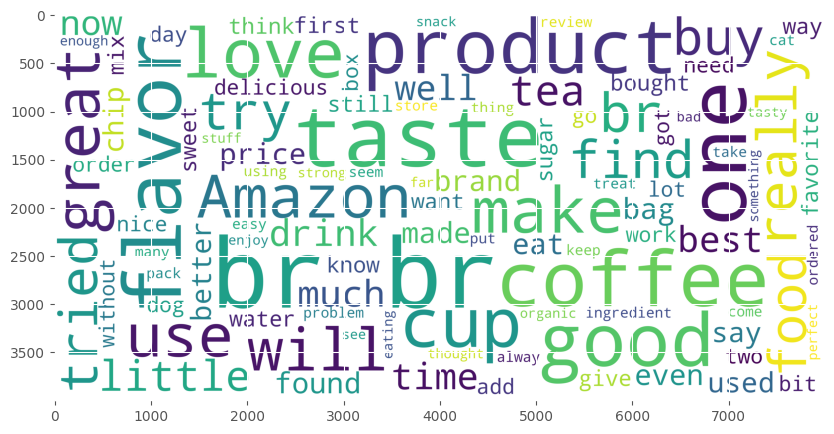

In [114]:
word_cloud_text = "".join(amazon_reviews['Text'])

word_cloud = WordCloud(max_font_size = 100,
                       max_words = 100,
                       background_color = "white",
                       scale = 10,
                       width = 800,
                       height = 400).generate(word_cloud_text)

plt.figure(figsize = (10,5))
plt.imshow(word_cloud)
      



#**Standardizing the ratings for sentiment analysis (5 mts)**
For the purposes of sentiment analysis, we will convert all of the ratings into binary values using the follow rule:

* Ratings of 4 or 5 will get mapped to 1 and will be reltead to positive reviews
* Ratings of 1 or 2 will get mapped to 0 and will be related to negative reviews
* Ratings of 3 will get removed since they will represent neutral reviews.



In [115]:
amazon_reviews['Sentimenta_scores'] = np.where(amazon_reviews['Score'] > 3,1,0)
amazon_reviews = amazon_reviews[amazon_reviews['Score']!=3]
100*amazon_reviews['Sentimenta_scores'].value_counts(normalize = True)

1    83.344277
0    16.655723
Name: Sentimenta_scores, dtype: float64

<Axes: xlabel='Sentimenta_scores', ylabel='count'>

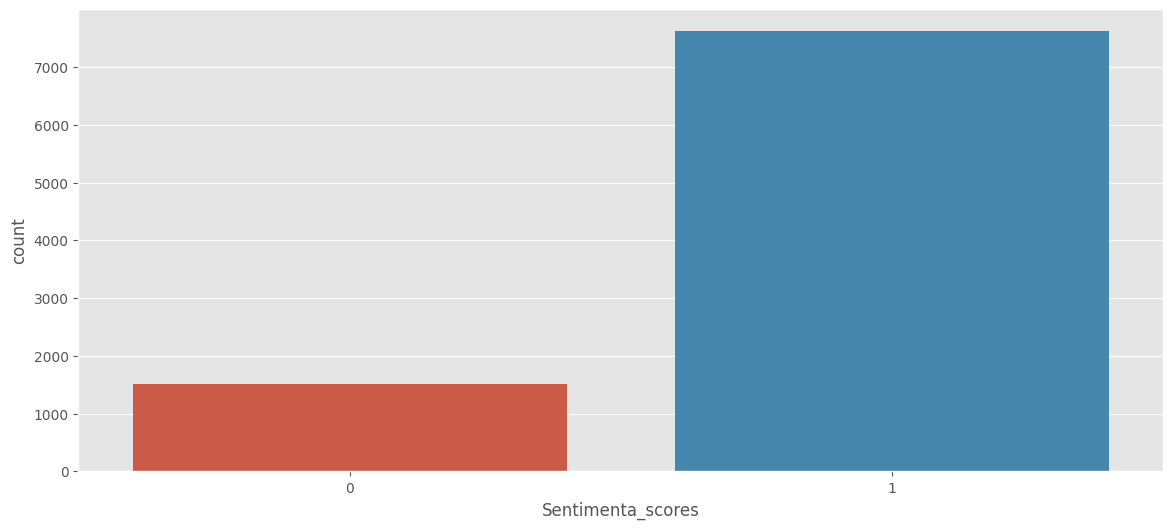

In [116]:
sns.countplot(x = amazon_reviews['Sentimenta_scores'],data = amazon_reviews)

There is huge a class imbalance that we are going to handle by defining robust metrics


#pre-processing 

In [117]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
word_tokenize("I'm belonging from Bihar and born and brought up Mumbai")

['I',
 "'m",
 'belonging',
 'from',
 'Bihar',
 'and',
 'born',
 'and',
 'brought',
 'up',
 'Mumbai']

In [119]:
#1. Converting words to lower/upper case
amazon_reviews['reviews_text_new'] = amazon_reviews['Text'].str.lower()

In [120]:
# For reviews not converted to lower case
token_list = [word_tokenize(each) for each in amazon_reviews['Text']]
token = [word for sublist in token_list for word in sublist]
token_list = len(set(token))
print("Without lower case: ",token_list)

# For reviews converted to lower case
token_list_lower = [word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
token_lower = [word for sublist in token_list_lower for word in sublist]
token_list_lc = len(set(token_lower))
print("With lower case: ",token_list_lc)


Without lower case:  27509
With lower case:  22473


<Axes: >

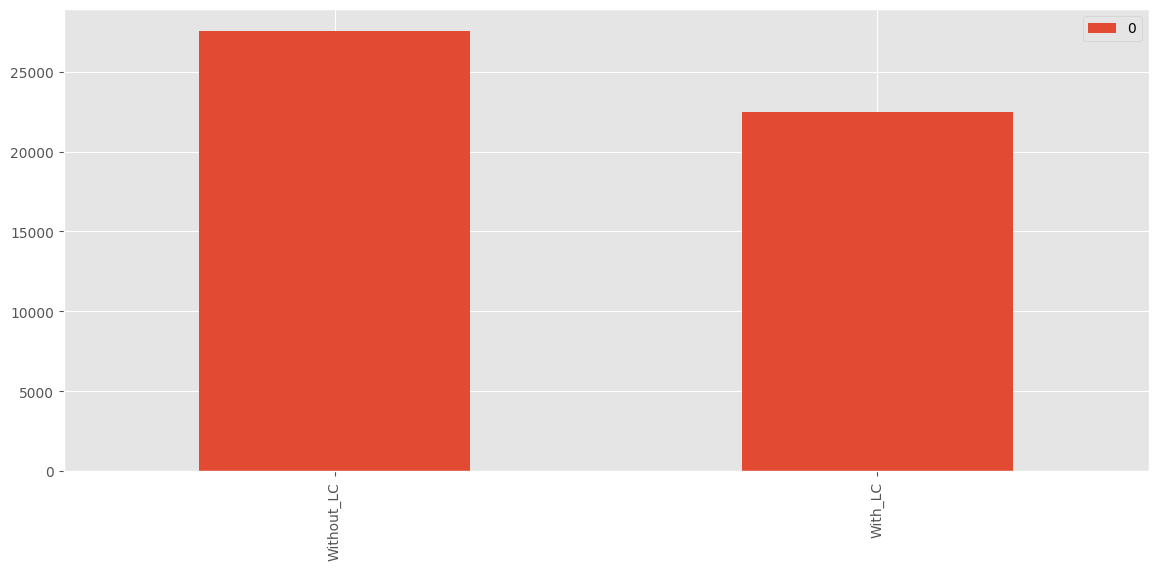

In [121]:
index = ['Without_LC','With_LC']
df = pd.DataFrame(data = [token_list,token_list_lc],index = index)
df.plot(kind = 'bar')


The number of tokens has gone down by ~18% just from normalizing the corpus.

Removing special characters is a subjective call, especially in cases like this one. People often use special characters to express their emotions and might leave a review like 'This product is the worst!!!', while a positive review could be like 'This product is the best. Loved it!'. Here, the presence of exclamation marks clearly indicates something about the underlying sentiment, so removing them may well not be a good idea.

On the other hand, removing non-emotionally charged punctuation such as commas, periods, and semicolons is likely safe.



In [122]:
#2. Removing special characters
amazon_reviews['Text'][5]

'I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.'

In [123]:
spl_review = amazon_reviews['reviews_text_new'].apply(lambda review:[char for char in list(review) if not char.isalnum() and char != ' '])
flat_flatten = [item for sublist in spl_review for item in sublist]
set(flat_flatten)


{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '§',
 '®'}

In [124]:
review_backup = amazon_reviews['reviews_text_new'].copy()
amazon_reviews['reviews_text_new'] = amazon_reviews['reviews_text_new'].str.replace(r'[^A-Za-z0-9]+',' ')

amazon_reviews['reviews_text_new'][5]

'i got a wild hair for taffy and ordered this five pound bag the taffy was all very enjoyable with many flavors watermelon root beer melon peppermint grape etc my only complaint is there was a bit too much red black licorice flavored pieces just not my particular favorites between me my kids and my husband this lasted only two weeks i would recommend this brand of taffy it was a delightful treat '

In [125]:
# For reviews not converted to lower case
token_list = [word_tokenize(each) for each in amazon_reviews['Text']]
token = [word for sublist in token_list for word in sublist]
token_without_lc = len(set(token))
print("Without lower case: ",token_without_lc)

# For reviews converted to lower case

token_lists = [word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
tokens = [item for sublist in token_lists for item in sublist]
token_with_lc = len(set(tokens))
print("Number of unique tokens now: ",token_with_lc)


Without lower case:  27509
Number of unique tokens now:  18039


<Axes: >

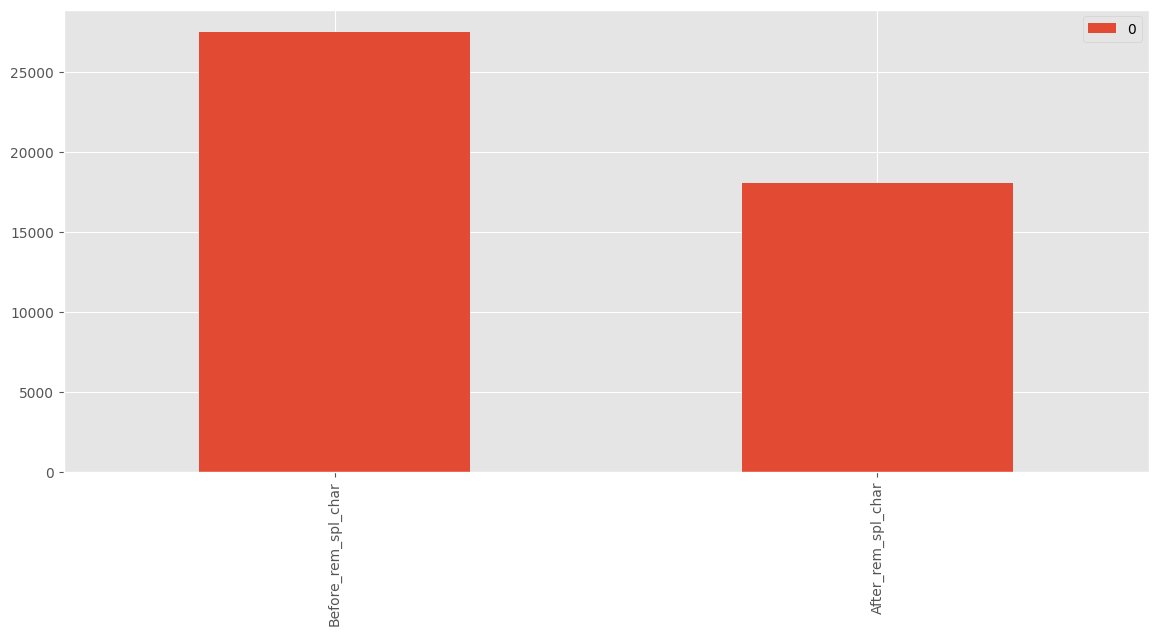

In [126]:
index = ['Before_rem_spl_char','After_rem_spl_char']
df = pd.DataFrame(data = [token_without_lc,token_with_lc],index = index)
df.plot(kind = 'bar')

In [127]:
#Stopwords and high/low frequency words

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
noise_words = []
eng_stopword = stopwords.words('english')
eng_stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [129]:
stop_word = set(eng_stopword)
without_stopwords = []
stopword = []

sentence = amazon_reviews['reviews_text_new'][0]
word = nltk.word_tokenize(sentence)

for item in word:
  if item in stop_word:
    stopword.append(item)
  else:
    without_stopwords.append(item)


print('-- Original Sentence --\n', sentence)
print('-- Word Tokenize --\n', word)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stopwords)


-- Original Sentence --
 i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most 
-- Word Tokenize --
 ['i', 'have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', 'the', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', 'my', 'labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most']

-- Stopwords in the sentence --
 ['i', 'have', 'of', 'the', 'and', 'have', 'them', 'all', 'to', 'be', 'of', 'the', 'more', 'a', 'than', 'a', 'and', 'it', 'my', 'is', 'and', 'she', 'this', 'than', 'most']

-- Non-stopwords in the sentence --
 ['bought', 'several', 'vitality', 'canned', '

In [130]:
def remove_stop_words(text):
  text1 = [word.lower() for word in text.split() if word.lower() not in eng_stopword]
  return " ".join(text1)

In [131]:
amazon_reviews['Text_after_stopwords'] = amazon_reviews['reviews_text_new'].apply(remove_stop_words)
amazon_reviews[['reviews_text_new','Text_after_stopwords'] ]

,reviews_text_new,Text_after_stopwords
0,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...
1,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanuts p...
2,this is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,great taffy at a great price there was a wide ...,great taffy great price wide assortment yummy ...
...,...,...
9995,we switched from the advance similac to the or...,switched advance similac organic product think...
9996,like the bad reviews say the organic formula c...,like bad reviews say organic formula constipat...
9997,i wanted to solely breastfeed but was unable t...,wanted solely breastfeed unable keep supplemen...
9998,i love the fact that i can get this delieved t...,love fact get delieved house delievy charge ha...


In [132]:
#Stemming & lemmatization

from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [133]:
porter = PorterStemmer()
lancas = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [134]:
print("Porter Stemmer")
print(porter.stem("buy"))
print(porter.stem("buying"))
print(porter.stem("Beautiful"))

Porter Stemmer
buy
buy
beauti


In [135]:
print("Lancaster Stemmer")
print(lancas.stem("buy"))
print(lancas.stem("buying"))
print(lancas.stem("Beautiful"))

Lancaster Stemmer
buy
buy
beauty


In [136]:
#Provide a word to be lemmetized

print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("buy",wordnet.NOUN))
print(lemmatizer.lemmatize("buying",wordnet.VERB))
print(lemmatizer.lemmatize("Beautiful",wordnet.VERB))

WordNet Lemmatizer
buy
buy
Beautiful


In [137]:
def stem_terms(row):
  return [lancas.stem(term) for term in row]

def lemmatize_terms(row):
  return [lemmatizer.lemmatize(term) for term in row]


In [145]:
amazon_reviews['reviews_text_stemm'] = amazon_reviews['Text_after_stopwords'].apply(stem_terms)
amazon_reviews['reviews_text_lemma'] = amazon_reviews['Text_after_stopwords'].apply(lemmatize_terms)

In [146]:
amazon_reviews[['Text_after_stopwords','reviews_text_stemm','reviews_text_lemma']]

,Text_after_stopwords,reviews_text_stemm,reviews_text_lemma
0,bought several vitality canned dog food produc...,"[b, o, u, g, h, t, , s, e, v, e, r, a, l, , ...","[b, o, u, g, h, t, , s, e, v, e, r, a, l, , ..."
1,product arrived labeled jumbo salted peanuts p...,"[p, r, o, d, u, c, t, , a, r, r, i, v, e, d, ...","[p, r, o, d, u, c, t, , a, r, r, i, v, e, d, ..."
2,confection around centuries light pillowy citr...,"[c, o, n, f, e, c, t, i, o, n, , a, r, o, u, ...","[c, o, n, f, e, c, t, i, o, n, , a, r, o, u, ..."
3,looking secret ingredient robitussin believe f...,"[l, o, o, k, i, n, g, , s, e, c, r, e, t, , ...","[l, o, o, k, i, n, g, , s, e, c, r, e, t, , ..."
4,great taffy great price wide assortment yummy ...,"[g, r, e, a, t, , t, a, f, f, y, , g, r, e, ...","[g, r, e, a, t, , t, a, f, f, y, , g, r, e, ..."
...,...,...,...
9995,switched advance similac organic product think...,"[s, w, i, t, c, h, e, d, , a, d, v, a, n, c, ...","[s, w, i, t, c, h, e, d, , a, d, v, a, n, c, ..."
9996,like bad reviews say organic formula constipat...,"[l, i, k, e, , b, a, d, , r, e, v, i, e, w, ...","[l, i, k, e, , b, a, d, , r, e, v, i, e, w, ..."
9997,wanted solely breastfeed unable keep supplemen...,"[w, a, n, t, e, d, , s, o, l, e, l, y, , b, ...","[w, a, n, t, e, d, , s, o, l, e, l, y, , b, ..."
9998,love fact get delieved house delievy charge ha...,"[l, o, v, e, , f, a, c, t, , g, e, t, , d, ...","[l, o, v, e, , f, a, c, t, , g, e, t, , d, ..."


In [ ]:
#Building a machine learning model

